## Artificial Neural Networks

Link to [Jupyter Notebook Manual]

[Jupyter Notebook Manual]: https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.3-Hyperlinks "Users Manual"

***

## Links 

- [1. Keras Sequential Model](#Keras-Sequential-Model)
- [2. Activation Function](#Activation-Function)
- [3. Learning](#Learning)
- [4. Error](#Error)
- [5. Hyperparameters](#Learning)

***

### Data for examples

In [1]:
#weight, height
train_samples = [[150, 50],[140, 48],[176, 70],[172, 75],[186, 88],[182, 75],[166, 66],[159, 55],[190, 94],[200, 104]]

In [2]:
#0: male
#1: female
train_labels = [1,1,0,0,0,0,1,1,0,0]

#### Importing from Keras

In [9]:
import keras
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

### Keras Sequential Model 

Replicating a simple sequential model using Keras. The Sequential class is instantiated, in its constructor it takes an array of Dense objects. 
The first argument of the dense object represents how many neurons in the layer. 
The second argument takes in account the input shape for that hidden layer. The last argument is the activation function. The following model is being replicated:

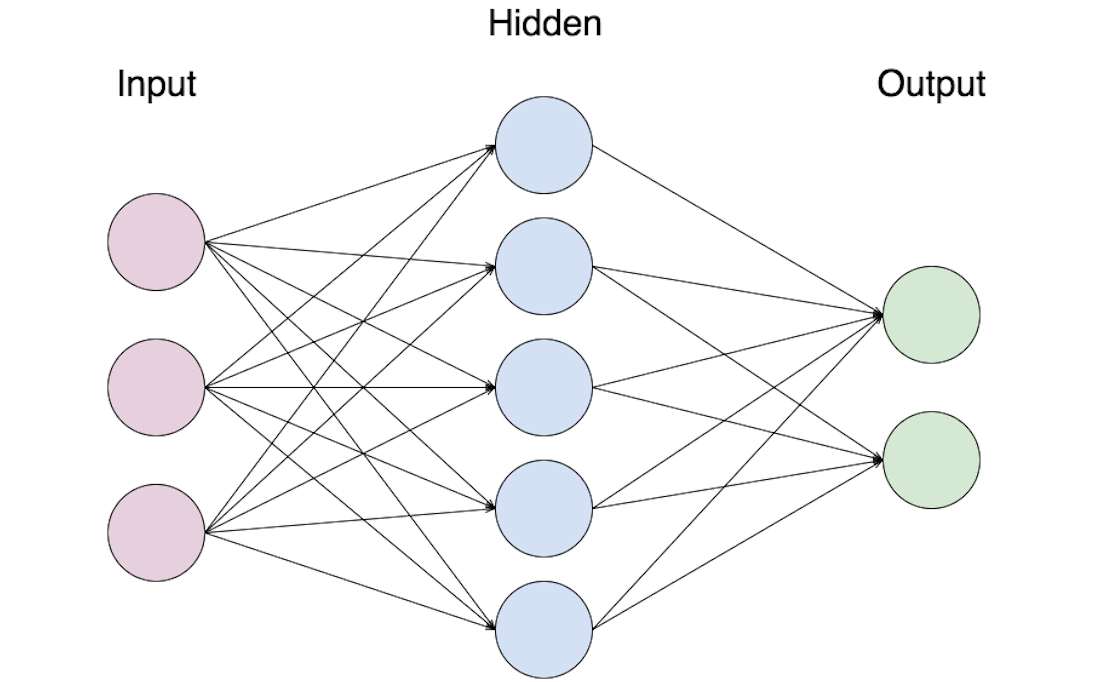

In [10]:
seq_model1 = Sequential ([
   Dense(5, input_shape =(3,), activation = 'relu'),
   Dense(2, activation = 'softmax')
])

###  Activation Function

The activation function of a neuron defines the output of a neuron given a set of inputs
 - Biologically inspired in the brain.
 - ReLU
 - Sigmoid Function
 
If something is not specified in the constrctor, the method add can be used

In [11]:
seq_model1.add(Dense(2))
seq_model1.add(Activation('softmax'))

### Training 

Trying to solve an optimization problem: Optimize for weights and biases
- Optimize weights 
    - With Stochastic Gradient Descent or other optimization techniques
- Objective: Minimize loss function
    - Mean Loss Function (MSE)

A single pass of the data through the model is called an __epoch__.
The model will "learn" after multiple epochs due to __back propagation__


### Learning
Once the data is feeded to the model, the loss is calculated from the data ouptut. That is, the image with its corresponding label is compared with the probability generated by the output. The loss is calculated from that.

Then we can calculate: $$ y= \frac{d(loss)}{d(weight)} * learningRate $$ and substitute it from its corresponding weight.
The learning rate is normally between 0.01 and 0.0001

Then, the previous weight get substracted by its corresponding y: $$ w1' = w1 - y1 $$



#### Supervised Learning

Each sample data comes with a corresponding label saying what is its classification. Training data and validation data comes in the forms of tuples (data, label)

#### Unsupervised Learning 

The training and validation data do not contain labels. Accuracy is not a metric in this type of learnig since output probabilities cannot be mapped to labels. Instead the model learns to learn structure from the data. 

Where is unsupervised learning used?
- Cluster algortihms use unsupervised learning since data can intrinsically occupy certain common ground. Then, clustering    algorithms can clasiffy the cluster into different labels.
- Autoencoders: Take input and outputs a reconstruction of this input. (Applications: Noise)

#### Semi-supervised Learning 

Basic idea: Given a large unlabeled data, manually label some of it. Afterwards, train the model wih that labeled data and then feed it the unlabeled data and use the predictions of the model as the pseudo-label. Then train the model again with all the data, that is, the manually labeled data and the pseudo-labeled data.

#### Learning Rate


If we choose a value close to 0.01, there is a risk of overshooting and getting past the minimun. With a smaller learning rate, it will take the model longer to get to the minimize loss but it will be harder to overshoot.

The model has to be compiled before use. The learning rate, loss function and metrics are specified as parameters. Adam is the optimizer that has a parameter the learning rate. After compilation, the model is trained using the fit function.

In [12]:
seq_model2 = Sequential([
    Dense(16, input_shape = (1,), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'sigmoid')
])

In [13]:
seq_model2.compile(Adam(lr=.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#seq_model2.optimizer.lr = 0.01 can be also used to change the learning rate.

In [14]:
seq_model2.fit(x= train_samples, y= train_labels, batch_size = 2, epochs = 10, validation_split = 0.2, shuffle = True, verbose = 2)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 10 arrays: [array([[150],
       [ 50]]), array([[140],
       [ 48]]), array([[176],
       [ 70]]), array([[172],
       [ 75]]), array([[186],
       [ 88]]), array([[182],
       [ 75]]), array([[166],
     ...

### Error  

A simple way to define errow for now is: $$ e = output - true$$ After each epoch, the error then will be feeded into the loss function so that the loss can be calculated. That loss is then used as explained above to recalculate the weights of the network. 

### Train, Test and Validation Sets

The data in the train, test and validation set must be different. 

The data samples in the train and validation sets consists of tuples in the form of (sample, label)

- The train set and validation set should be labeled
    - Validation split can be used in compile function as valditation_split parameter to split the training data into training data and validation data.
    - If a validation set exists, then it can be passed to the compiler function as the validation_data parameter
- The test set should not be labeled

### Overfitting

If the model is performing well with training data but not performing well with validation data then the model lis likely to be __overfitting__

In an abstract way, overfitting means that the model is not able to generalize well.
 
Overfitting can be spotted by comparing the metrics of the test data with the validation data. If the model is performing much worse with the validation data, that is, the val_loss is big and val_acc is small, then the model is overfitting.

Ways to reduce overfitting:
 - Add more data -> more diverse training data
 - Data augmentation -> cropping, rottating, clipping, zooming, etc test data.
     - Example: dogs to the left -> dogs to the right
 - Reduce complexity of model -> reducing laters, or neurons
 - Increase dropout -> Randomly ignore some nodes 

### Underfitting

If the model is not even performing well on the training data, that is, loss is high and acc is low and it dosen't improve on the course of the epochs,then the model is underfitting.

Ways to reduce overfitting
 - Increase complexity of model -> increase layers, neurons
 - Add more features to the training set
 - Reduce dropout, see changes between training data and validation data

### Regularization 

Regularization is penalzing for complexity since model doesn't generalize well.
Add a term to our loss function so it penalizes for large weights, someting like $loss + x$ where x is penalty for large weights.

#### L2  regularization

$$ x = (\sum_{j = 1}^{n}w^{[j]^{2}})\frac{\lambda}{2m} $$

#### Regularization in Keras

In [ ]:
from keras import regularizers

In [ ]:
seq_model3 = Sequential([
    Dense(16, input_shape = (1, ), activation = 'relu'),
    #The only parameter added is the regularization argument in which the regularizer is specified with its parameter
    Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.02)),
    Dense(2, activation = 'sigmoid')
])

***

### Batch Size 

Batch size is a __hyperparameter__ that refers to the namble of samples that will be send to the model.
Recall that one epoch refers to a single pass of all the data through the model.
- For example, if our data set has 100 samples and our batch size is 10, it will take 10 batches to complete 1 epoch

But why are batches needed?
- The larger the batch size, the faster the training. However slower computers may not be able to handle big batch sizes.
- Tweak the batch size to optimize perfomance of modelnN (heuristic)

### Fine Tuning 

To understand fine tuning, __transfer learning__ must be first undesrtood. This idea refers of applying something learned to solve a speicfic problem to solve another type of problem. 
Fine tuning refers to applying transfer learning.
A model that has been trained to recognize something can be fine tuned to recognize something else, instead of leaerning from scratch.

### Data Augmentation 

Data augmentation refers to creating new data by modificating previously available data.
It is useful to add more data to a model. 

It is useful because:
 - More sample data is a added to the model
 - The model is now able to generalize better since data uagmentation reduces overfitting
 - Flipping images is ok, but not vertically flipping them!
 - Very simple to implement using Keras image generator class

### Predicitons 

In [ ]:
predictions_seqm3 = seq_model3.predict(scaled_test_samples, batch_size = 10, verbose = 0)

Our prediction will show a list of the probabilities for each category per test sample. For example, if a model is used to predict wheter the image shows a cat dog or a mouse, a sample output could be [0.05 0.9 0.05] meaning that its is 90% probable that the image is a dog

### Convolutional Neural Networks (covnets) 